# predicting heart disease using machine learning

we're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation


## preparing the tools

In [63]:
# import all the tools we need

# regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from sklearn-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
data=pd.read_csv('heart-disease.csv')
data.shape
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Data Exploration (EDA)
the goal here is to find out more about the data and become a subject matter expert on the data set you are working with.
1. What question(s) are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more our of your data?

In [3]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

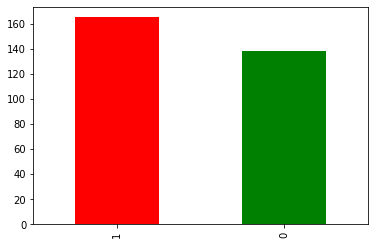

In [4]:
data.target.value_counts().plot(kind='bar',color=['red','green'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [5]:
## comparing target column with sex column
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


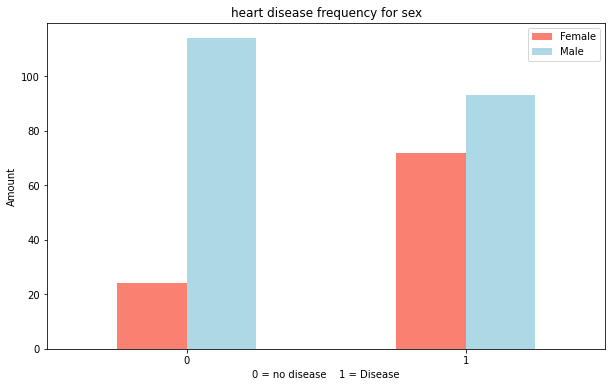

In [6]:
#ploting crosstab
pd.crosstab(data.target,data.sex).plot(kind='bar',
                                      figsize=(10,6),
                                      color=['salmon','lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel('0 = no disease    1 = Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0);
plt.legend(['Female','Male']);

Text(0, 0.5, 'heart rate')

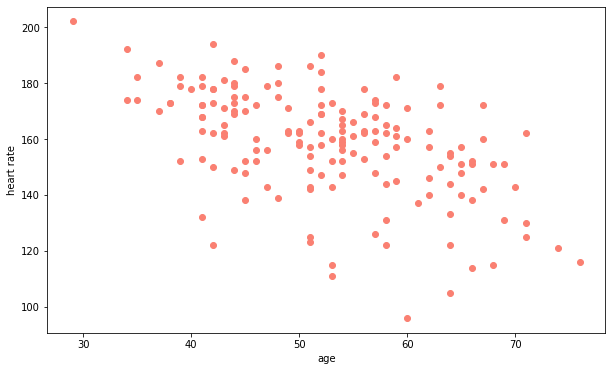

In [9]:
# age vs max heart rate for heart disease
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c='salmon');
plt.xlabel('age')
plt.ylabel('heart rate')

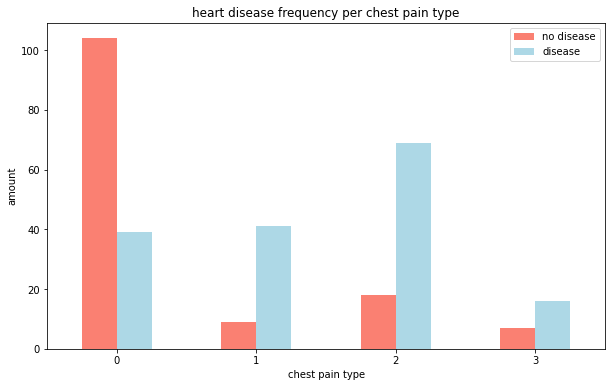

In [7]:
pd.crosstab(data.cp,data.target).plot(kind='bar',
                                     figsize=(10,6),
                                     color=['salmon','lightblue'])
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0);

In [8]:
# make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

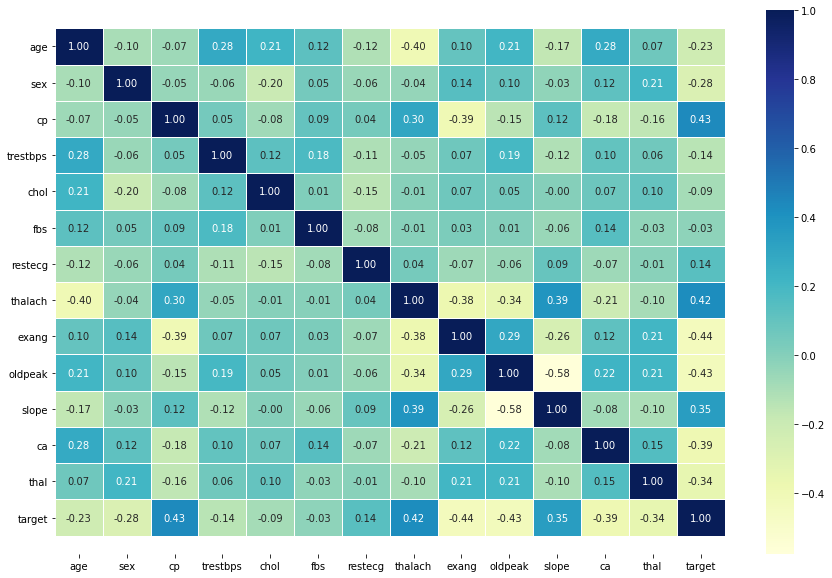

In [9]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,
            fmt='.2f',
              cmap='YlGnBu');
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [3]:
x=data.drop('target',axis=1)
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
# building machine learning model
# we will try 3 models
#   1. Logistic regresssion
 #   2. k-nearest neighbour
  #  3. random forest classifier'''

In [4]:
#puting model in dictionary
models={'logistic regression':LogisticRegression(solver='liblinear'),
       'KNN':KNeighborsClassifier(),
       'Random Forest':RandomForestClassifier()}
#create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [5]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

{'logistic regression': 0.8032786885245902,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.7704918032786885}

<AxesSubplot:>

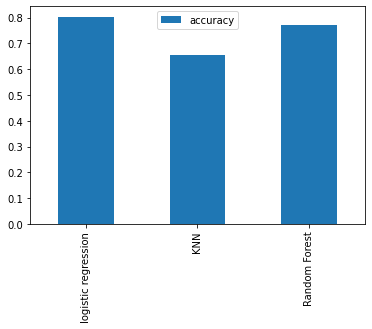

In [6]:
#model comparision
model_compare=pd.DataFrame(model_score,index=['accuracy'])
model_compare.T.plot(kind='bar')

let's look at the following:
1. hyperparameter tuning
2. feature importance
3. confusion matrix
4. cross-validation
5. precision
6. recall
7. f1 score
8. classification report
9. roc curve
10. area under the curve(AUC)

## hypterparameter tuning

In [7]:
#let's tune knn
train_score=[]
test_score=[]

#create a list of different values for n neighbors
neighbors=range(1,21)

#setup knn instance
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    


In [8]:
t=pd.DataFrame(test_score,index=train_score)

In [9]:
t

,0
1.000000,0.622951
0.834711,0.508197
0.805785,0.606557
0.793388,0.590164
0.772727,0.655738
0.756198,0.590164
0.747934,0.622951
0.719008,0.573770
0.706612,0.622951
0.690083,0.639344


maximum knn score on the test data:70.49%


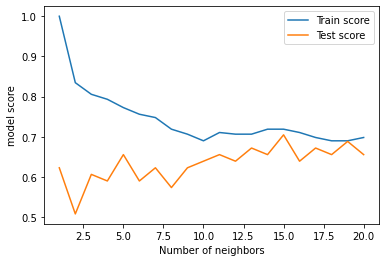

In [10]:
plt.plot(neighbors,train_score,label='Train score')
plt.plot(neighbors,test_score,label='Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('model score')
plt.legend()
print(f'maximum knn score on the test data:{max(test_score)*100:.2f}%')

 now we will not tuning by hand we will use randamizedsearch cv for tuning work.


## hyperparamter tuning with RandomizedSearchCV
we're going to tune:
* LogisticRegression()
* RandomForestClassifier()<br>
....using RandomizedSearchCV

In [11]:
#create hyperparamter grid for logisticregression
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

# create a hyperparamter grid for randomforestclassifier
rf_grid={'n_estimators':np.arange(10,1000,50),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

In [12]:
# using randomized search cv for logisticregression
np.random.seed(42)
#set up hypter paramter
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train,y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [13]:
rs_log_reg.score(x_test,y_test)

0.819672131147541

In [14]:
# set up for randomforestclassifier
np.random.seed(42)
rs_rfc=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         n_iter=20,
                         cv=5,
                         verbose=True)
rs_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [15]:
rs_rfc.best_params_
rs_rfc.score(x_test,y_test)

0.8360655737704918

## hyperparameter tuning with GridSearchCV

In [16]:
#  gridsearchcv for our logisticregresion
log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [17]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [18]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

## evaluting our tuned machine learning classifier,beyond accuracy 
* ROC curve and AUC curve
* confusion matrix
* classification report
* precision
* recall
* f1-score

In [19]:
# to evaluate we need to do prediction
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
y_test

279    0
239    0
88     1
20     1
113    1
      ..
240    0
301    0
170    0
39     1
152    1
Name: target, Length: 61, dtype: int64

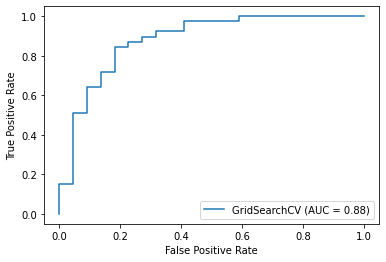

In [21]:
# plot roc curve and calculate auc matrix
plot_roc_curve(gs_log_reg,x_test,y_test)

In [22]:
# confustion matrix
print(confusion_matrix(y_test,y_preds))

[[12 10]
 [ 1 38]]


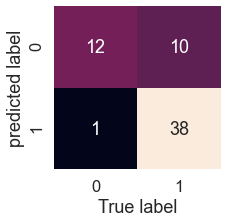

In [23]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')

plot_conf_mat(y_test,y_preds)

In [24]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.55      0.69        22
           1       0.79      0.97      0.87        39

    accuracy                           0.82        61
   macro avg       0.86      0.76      0.78        61
weighted avg       0.84      0.82      0.81        61



## calcuate evaluation metrics using cross-validation
we're going to calculate accuarcy,precision,recall and f1-score of our model using <br>cross-validation and to do so we'll be using `cross_val_score`

In [25]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [26]:
clf=LogisticRegression(C=0.1082636733874054, 
                       solver= 'liblinear')

In [27]:
# cross-val accuracy
cv_acc=cross_val_score(clf,
                      x,y,cv=5,scoring='accuracy')
cv_acc
m_a=cv_acc.mean()

In [28]:
#cross-val precision
cv_precision=cross_val_score(clf,
                            x,y,cv=5,scoring='precision')
cv_precision
m_p=cv_precision.mean()


In [32]:
#cross-val recall
cv_recall=cross_val_score(clf,x,y,scoring='recall')
cv_recall
r_m=cv_recall.mean()

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [30]:
#cross-val f1-score
cv_f1=cross_val_score(clf,x,y,scoring='f1')
cv_f1
m_f=cv_f1.mean()

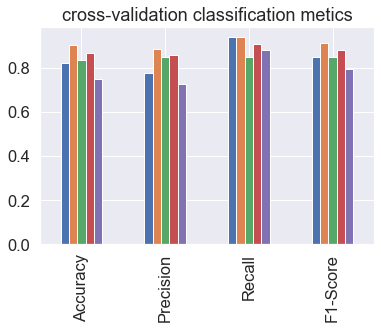

In [43]:
# visualizr cross validation metrics
cv_matrix=pd.DataFrame({'Accuracy':cv_acc,
                       'Precision':cv_precision,
                       'Recall':cv_recall,
                       'F1-Score':cv_f1},
                       index=range(0,5))
cv_matrix.T.plot.bar(title='cross-validation classification metics',legend=False);


In [36]:
cv_matrix

,Accuracy,Precision,Recall,F1-Score
0,0.819672,0.775000,0.939394,0.849315
1,0.901639,0.885714,0.939394,0.911765
2,0.836066,0.848485,0.848485,0.848485
3,0.866667,0.857143,0.909091,0.882353
4,0.750000,0.725000,0.878788,0.794521


## feature importance

In [46]:
clf=LogisticRegression(C=0.20433597178569418,
             solver='liblinear')
clf.fit(x_train,y_train);


In [48]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
clf.coef_

array([[ 0.00939899, -0.69555378,  0.60790398, -0.01566022, -0.00229504,
         0.13287333,  0.34354494,  0.02645287, -0.50159374, -0.54592003,
         0.43977971, -0.69849123, -0.66081655]])

In [51]:
# match coef's of features to columns
feature_dict=dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.009398994325931128,
 'sex': -0.6955537777863676,
 'cp': 0.6079039814257153,
 'trestbps': -0.015660216367983912,
 'chol': -0.002295039262861819,
 'fbs': 0.13287332815726308,
 'restecg': 0.34354494453741474,
 'thalach': 0.026452865459090737,
 'exang': -0.5015937436300565,
 'oldpeak': -0.5459200267862415,
 'slope': 0.43977971212936307,
 'ca': -0.6984912254410736,
 'thal': -0.6608165480603367}

<AxesSubplot:title={'center':'feature importance'}>

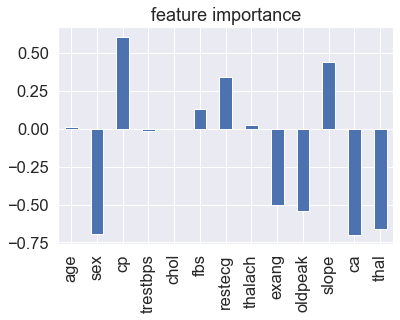

In [54]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='feature importance',legend=False)

In [59]:
x=data.drop(['age','trestbps','chol','thalach','fbs'],axis=1)
y=data.target


In [60]:
log_reg_grid={'C':np.logspace(-4,4,30),
             'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


In [61]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

In [62]:
x.head()

,sex,cp,restecg,exang,oldpeak,slope,ca,thal,target
0,1,3,0,0,2.3,0,0,1,1
1,1,2,1,0,3.5,0,0,2,1
2,0,1,0,0,1.4,2,0,2,1
3,1,1,1,0,0.8,2,0,2,1
4,0,0,1,1,0.6,2,0,2,1
